In [168]:
import os
from os import chdir

import math         # opérations mathématiques
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy  as np
from numpy import random

from sklearn.ensemble import RandomForestRegressor # packages pour rdforest
from sklearn.ensemble import AdaBoostRegressor     # packages pour AdaBoost
from sklearn.ensemble import BaggingRegressor      # algorithmes de bagging
from sklearn.svm import SVR                        # packages pour SVR
from sklearn.model_selection import GridSearchCV # parameter estimation 
                                                 # using grid search with 
                                                 # cross-validation

import matplotlib.pyplot as plt # sorties graphiques

In [169]:
os.getcwd()

'/Users/johanjublanc/JupyterProjects/python_models'

In [170]:
x_train = pd.read_csv("x_train",index_col=0)
x_train.head()

,capacity,failure_rate,margin,price,prod_cost,product_type__auto-portee,product_type__electrique,product_type__essence,quality__Hight,quality__Low,quality__Medium,warranty__1 an,warranty__2 ans,warranty__3 ans
0,10.492623,0.042528,633.766584,828.802103,195.035519,1,0,0,0,1,0,0,0,1
1,20.273730,0.037896,731.576817,882.894916,151.318099,1,0,0,0,1,0,0,0,1
2,20.190457,0.039111,741.218202,919.355522,178.137319,1,0,0,0,1,0,0,0,1
3,27.220131,0.041303,654.255635,817.085097,162.829462,1,0,0,0,1,0,0,0,1
4,16.370911,0.037938,703.094527,844.581465,141.486938,1,0,0,0,0,1,0,0,1


In [171]:
y_train = pd.read_csv("y_train",header=None,index_col=0).reset_index()
y_train = pd.Series(y_train.iloc[:,1])
y_train.head()

0    0.650648
1    0.699792
2    0.632129
3    0.810730
4    0.757614
Name: 1, dtype: float64

In [172]:
y_train.describe()

count    1399.000000
mean        0.636507
std         0.124016
min         0.297384
25%         0.549369
50%         0.641351
75%         0.726746
max         0.952877
Name: 1, dtype: float64

In [173]:
x_train.describe()

,capacity,failure_rate,margin,price,prod_cost,product_type__auto-portee,product_type__electrique,product_type__essence,quality__Hight,quality__Low,quality__Medium,warranty__1 an,warranty__2 ans,warranty__3 ans
count,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000
mean,47.663266,0.166448,186.262609,260.075165,56.302624,0.101501,0.295211,0.603288,0.095068,0.694067,0.210865,0.603288,0.295211,0.101501
std,19.840501,0.073605,191.011102,259.949127,59.461096,0.302099,0.456301,0.489390,0.293414,0.460966,0.408069,0.489390,0.456301,0.302099
min,0.013884,0.028906,52.943989,62.162200,7.095443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.853890,0.095678,62.247602,73.379425,10.856096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.309242,0.199796,66.299672,78.439753,12.339867,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,61.905015,0.228011,265.370973,384.265263,113.097207,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,104.614865,0.302465,790.012898,964.973926,210.984941,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Choix d'un modèle par cross-validation

### Choix des hyper-paramètres pour trois modèles initiaux par cross-validation 3-fold

##### SupportVectorMachine : régression

Grille des paramètres à tester

In [174]:
svr_param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4,1e-5],
                   'C': [1, 10, 100, 1000,10000]}]                

Recherche des paramètres optimaux

In [175]:
gs_svr = GridSearchCV(SVR(), 
                      cv=3,
                      scoring = 'neg_mean_squared_error',
                      param_grid=svr_param_grid,
                      verbose=3, 
                      pre_dispatch="None")

gs_svr.fit(x_train, y_train)        # entrainement
print(gs_svr.best_params_)          # paramètres retenus
print(gs_svr.best_score_)           # performance

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=-0.010030505023394441, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=-0.005109969535930433, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=-0.005995148999450902, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=-0.008152316626225902, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=-0.005898610340151612, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=-0.006997905682869425, total=   0.0s
[CV] C=1, gamma=1e-05, kernel=rbf ..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  C=1, gamma=1e-05, kernel=rbf, score=-0.02975038986686841, total=   0.0s
[CV] C=1, gamma=1e-05, kernel=rbf ....................................
[CV]  C=1, gamma=1e-05, kernel=rbf, score=-0.010531223834447885, total=   0.0s
[CV] C=1, gamma=1e-05, kernel=rbf ....................................
[CV]  C=1, gamma=1e-05, kernel=rbf, score=-0.012454143577073569, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=-0.01027702749753785, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=-0.004802991021835167, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=-0.00553886626749111, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV]  C=10, gamma=0.0001, kernel=rbf, score=-0.007914168429131268, total=   0.0s
[CV] C=10, gamma=0.

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   21.5s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


##### RandomForest : régression

In [176]:
rfr_param_grid = [{'max_features': [0.7, 0.8, 0.9, 1],
                   'n_estimators':[500]}]

gs_rfr = GridSearchCV(RandomForestRegressor(),
                              scoring = 'neg_mean_squared_log_error',
                              param_grid=rfr_param_grid,
                              cv=3,
                              verbose=3)
gs_rfr.fit(x_train, y_train)
print(gs_rfr.best_params_)
print(gs_rfr.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] max_features=0.7, n_estimators=500 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=0.7, n_estimators=500, score=-0.01268714283676774, total=   0.9s
[CV] max_features=0.7, n_estimators=500 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  max_features=0.7, n_estimators=500, score=-0.0016443853551731074, total=   0.9s
[CV] max_features=0.7, n_estimators=500 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV]  max_features=0.7, n_estimators=500, score=-0.0023028023118288384, total=   0.9s
[CV] max_features=0.8, n_estimators=500 ..............................
[CV]  max_features=0.8, n_estimators=500, score=-0.012830935131568362, total=   1.0s
[CV] max_features=0.8, n_estimators=500 ..............................
[CV]  max_features=0.8, n_estimators=500, score=-0.001678612107980949, total=   1.0s
[CV] max_features=0.8, n_estimators=500 ..............................
[CV]  max_features=0.8, n_estimators=500, score=-0.0023285505290174435, total=   1.0s
[CV] max_features=0.9, n_estimators=500 ..............................
[CV]  max_features=0.9, n_estimators=500, score=-0.013309463815349799, total=   1.1s
[CV] max_features=0.9, n_estimators=500 ..............................
[CV]  max_features=0.9, n_estimators=500, score=-0.0016729344855152103, total=   1.1s
[CV] max_features=0.9, n_estimators=500 ..............................
[CV]  max_features=0.9, n_estimators=500, score=-0.0023393215

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   11.1s finished


{'max_features': 1, 'n_estimators': 500}
-0.004286482398139878


##### AdaBoost : régression

In [177]:
ada_param_grid = [{'loss' : ['linear', 'square', 'exponential'],
                   'learning_rate': [10**n for n in range(-2,2)],
                   'n_estimators':[500]}]

gs_ada = GridSearchCV(AdaBoostRegressor(),
                              scoring = 'neg_mean_squared_log_error',
                              param_grid=ada_param_grid,
                              cv=3,
                              verbose=3)
gs_ada.fit(x_train, y_train)
print(gs_ada.best_params_)
print(gs_ada.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] learning_rate=0.01, loss=linear, n_estimators=500 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.01, loss=linear, n_estimators=500, score=-0.006599731305499944, total=   0.8s
[CV] learning_rate=0.01, loss=linear, n_estimators=500 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  learning_rate=0.01, loss=linear, n_estimators=500, score=-0.0034975486639314927, total=   0.8s
[CV] learning_rate=0.01, loss=linear, n_estimators=500 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV]  learning_rate=0.01, loss=linear, n_estimators=500, score=-0.004483068049391308, total=   0.8s
[CV] learning_rate=0.01, loss=square, n_estimators=500 ...............
[CV]  learning_rate=0.01, loss=square, n_estimators=500, score=-0.007321711335788905, total=   0.7s
[CV] learning_rate=0.01, loss=square, n_estimators=500 ...............
[CV]  learning_rate=0.01, loss=square, n_estimators=500, score=-0.003228396913291714, total=   0.8s
[CV] learning_rate=0.01, loss=square, n_estimators=500 ...............
[CV]  learning_rate=0.01, loss=square, n_estimators=500, score=-0.0037339284949829124, total=   0.7s
[CV] learning_rate=0.01, loss=exponential, n_estimators=500 ..........
[CV]  learning_rate=0.01, loss=exponential, n_estimators=500, score=-0.006460171289822291, total=   0.8s
[CV] learning_rate=0.01, loss=exponential, n_estimators=500 ..........
[CV]  learning_rate=0.01, loss=exponential, n_estimators=500, score=-0.003527822935830307, total=   0.8s
[CV] learning_rate=0.01, loss=expo

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   20.3s finished


{'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 500}
-0.004593280705742782


### Création d'un index aléatoire pour découper les données en 5 parties

In [178]:
random.seed(2805) # on initialise la randomization pour que les résultats soient 
                  # reproductibles
index = np.random.randint(0,5,size=x_train.shape[0])

On vérifie que l'on a bien un vecteur composé de chiffres allant de 0 à 4 répartis de manière équilibrée.

In [179]:
occ = np.unique(index,return_counts=True)
print(sum(occ[1]) == x_train.shape[0])
print(occ)

True
(array([0, 1, 2, 3, 4]), array([245, 306, 281, 288, 279]))


### Optimisation de paramètres pour le modèle SVM - régression

##### Fonction de perte

Fonction pour calculer le RMSLE inspirée du code de Mark Nagelberg : https://www.kaggle.com/marknagelberg/rmsle-function

In [180]:
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred.iloc[i] + 1) - math.log(y.iloc[i] + 1))**2.0 
                    for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y)))**0.5

#### Fonction à optimiser

On utilise l'inverse du RMSLE parce qu'on utilise ensuite une recherche de maximum.

In [181]:
def svr_results_function(C,gamma):
    pred = pd.Series("NA", index=np.arange(len(y_train)))
    for ii in range(5):
        test_ii  = (index==ii) # pour chacun des 5 passages on teste sur la partie ii 
        train_ii = (index!=ii) # et on entraine les modèles sur le reste des données
        
        svr = SVR(C=C,gamma=gamma,kernel='rbf')                
        fit = svr.fit(x_train.iloc[train_ii,:],y_train.iloc[train_ii])      
        pred.loc[test_ii] = svr.predict(x_train.iloc[test_ii,:])
    
    return -rmsle(y_train,pred)

svr_results_function(0.01,100)

-0.07680729089140009

#### Bayesian optimizer

In [182]:
from bayes_opt import BayesianOptimization

Bounded region of parameter space

In [183]:
pbounds = {'gamma': (1e-3,1e-5),'C': (1,10000)}

optimizer = BayesianOptimization(
    f=svr_results_function,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(
    init_points=2,
    n_iter=50,
)

|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
|  1        | -0.05491  |  4.171e+0 |  0.000286 |
|  2        | -0.04827  |  2.144    |  0.000700 |
|  3        | -0.0705   |  1e+04    |  0.001    |
|  4        | -0.04889  |  1.059    |  0.001    |
|  5        | -0.04875  |  1.239    |  0.001    |
|  6        | -0.04878  |  1.203    |  0.001    |
|  7        | -0.0489   |  1.05     |  0.001    |
|  8        | -0.04868  |  1.342    |  0.001    |
|  9        | -0.04875  |  1.232    |  0.001    |
|  10       | -0.04857  |  1.474    |  0.001    |
|  11       | -0.04885  |  1.123    |  0.001    |
|  12       | -0.04887  |  1.106    |  0.001    |
|  13       | -0.04842  |  1.863    |  0.001    |
|  14       | -0.04874  |  1.241    |  0.001    |
|  15       | -0.04886  |  1.116    |  0.001    |
|  16       | -0.04835  |  2.088    |  0.001    |
|  17       | -0.04847  |  1.583    |  0.001    |
|  18       | -0.04883  |  1.15     |  0.001    |


### Initialisation du DataFrame des prédictions

On teste n modèles.

In [184]:
model_list = ["TRUE","svr","rfr","ada","agr","agr1","agr2","agr3","meta1","meta2","svr_bayes"]

On construit un DataFrame rempli de NaN avec autant de lignes que les données d'entraînement.

In [185]:
pred = pd.DataFrame("NA", index=np.arange(len(y_train)), columns=model_list)

La colonne "TRUE" contient les vraies valeurs.

In [186]:
pred["TRUE"]=y_train

On vérifie le format de la table.

In [187]:
print(pred.shape)

(1399, 11)


### Calcul des prédictions

##### Modèles initiaux

On utilise les paramètres optimisés pour comparer les 3 modèles initaux par cross-validation.

In [188]:
print("searchGrid : {}   bayes : {}".format(gs_svr.best_params_['C'],optimizer.max['params']['C']))

print("searchGrid : {}   bayes : {}".format(gs_svr.best_params_['gamma'],optimizer.max['params']['gamma']))

for ii in range(5):
    test_ii  = (index==ii) # pour chacun des 5 passages on teste sur la partie ii 
    train_ii = (index!=ii) # et on entraine les modèles sur le reste des données
    
    # SVR
    svr = SVR(C     =gs_svr.best_params_['C'],                     # paramètres
              gamma =gs_svr.best_params_['gamma'],                 # optimisés
              kernel=gs_svr.best_params_['kernel'])                
    svr.fit(x_train.iloc[train_ii,:],y_train.iloc[train_ii])       # fit sur !ii
    pred.loc[test_ii,"svr"] = svr.predict(x_train.iloc[test_ii,:]) # prédiction sur ii
    
    # RandomForestRegressor
    rfr = RandomForestRegressor(max_features =gs_rfr.best_params_['max_features'],
                                 n_estimators=gs_rfr.best_params_['n_estimators'])
    rfr.fit(x_train.iloc[train_ii,:],y_train.iloc[train_ii])
    pred.loc[test_ii,"rfr"] = rfr.predict(x_train.iloc[test_ii,:])

    # AdaBoostRegressor
    ada = AdaBoostRegressor(learning_rate=gs_ada.best_params_['learning_rate'],
                            loss         =gs_ada.best_params_['loss'],
                            n_estimators =gs_ada.best_params_['n_estimators'])
    ada.fit(x_train.iloc[train_ii,:],y_train.iloc[train_ii])
    pred.loc[test_ii,"ada"] = ada.predict(x_train.iloc[test_ii,:])
    
    # SVR avec paramètres avec optimisation bayesienne
    svr_bayes = SVR(C     =optimizer.max['params']['C'], # paramètres
                    gamma =optimizer.max['params']['gamma'],   # optimisés
                    kernel=gs_svr.best_params_['kernel'])                
    svr_bayes.fit(x_train.iloc[train_ii,:],y_train.iloc[train_ii])       # fit sur !ii
    pred.loc[test_ii,"svr_bayes"] = svr_bayes.predict(x_train.iloc[test_ii,:]) # prédiction sur ii
    
    # verbose
    print("Étape " + str(ii+1))

searchGrid : 100   bayes : 5.6435373871940495
searchGrid : 0.0001   bayes : 0.001
Étape 1
Étape 2
Étape 3
Étape 4
Étape 5


##### Modèles agrégés

L'agrégation de modèles permet parfois de réduire la variance des résultats et donc d'améliorer la prédiction.

In [189]:
pred["agr"]  = (pred["svr"] + pred["ada"] + pred["rfr"])/3
pred["agr1"] = (pred["ada"] + pred["rfr"])/2
pred["agr2"] = (pred["svr"] + pred["rfr"])/2
pred["agr3"] = (pred["svr"] + pred["ada"])/2

### Méta-modèles

On teste un algorithme de bagging (même principe que le random forest) avec comme régresseur de base un modèle SVR.

In [190]:
for ii in range(5):
    train_ii = (index!=ii)
    test_ii  = (index==ii)
    bagSVR = BaggingRegressor(SVR(C        =gs_svr.best_params_['C'],
                                  gamma    =gs_svr.best_params_['gamma'],
                                  kernel   =gs_svr.best_params_['kernel']),
                                  bootstrap=True,
                                  n_estimators = 100)
    bagSVR.fit(x_train.iloc[train_ii,:],y_train.iloc[train_ii])                         
    pred.loc[test_ii,"meta1"] = bagSVR.predict(x_train.iloc[test_ii,:])
    
    # verbose
    print("Étape " + str(ii+1))

Étape 1
Étape 2
Étape 3
Étape 4
Étape 5


On agrège le résultat avec le modèle qui semble le plus performant.

In [191]:
pred["meta2"] = (pred["agr2"] + pred["meta1"])/2

##### Calcul de l'erreur pour chaque modèle

On contruit un DataFrame pour enregister les résultats.

In [192]:
res = pd.DataFrame("NA", index=range(len(model_list)), 
                         columns=['model','CV1','CV2','CV3','CV4','CV5','Tot'])
# liste des modèles
res['model']=model_list

On calcule les résultats des modèles avec la fonction de perte rmsle.

In [193]:
for model in model_list:
    ii = res.loc[res['model']==model,].index
    res.loc[ii,'Tot'] = rmsle(pred["TRUE"],pred[model])

Résultats pour chaque tranche de la cross-validation 5-fold.

In [194]:
for jj in range(5):
    for model in model_list:
        ii = res.loc[res['model']==model,].index # indice de la ligne correspondant au modèle
        cv = 'CV' + str(jj+1)                    # numéro de la tranche de données (jj de 0 à 4)
        y = pred.loc[(index==jj),"TRUE"]         # valeurs réelles pour cette tranche
        y_pred = pred.loc[(index==jj),model]     # valeurs prédites par le modèle pour cette tranche
        res.loc[ii,cv] = rmsle(y,y_pred)         # affectation du résultat dans le tableau des résultats

##### Comparaison des résultats

In [195]:
print(res)
res = res[res['model']!='TRUE']

        model        CV1        CV2        CV3        CV4        CV5  \
0        TRUE          0          0          0          0          0   
1         svr  0.0442839   0.044057  0.0457288  0.0487987  0.0442542   
2         rfr   0.046118  0.0433324  0.0441201  0.0472895  0.0400421   
3         ada    0.05638  0.0518011  0.0537341  0.0555922  0.0468365   
4         agr  0.0465629  0.0432377  0.0446855    0.04749  0.0400116   
5        agr1  0.0500397  0.0461381  0.0475013  0.0500047  0.0417476   
6        agr2  0.0436568   0.041638  0.0432118  0.0460213  0.0398489   
7        agr3  0.0477998  0.0443693  0.0458224  0.0488101  0.0413249   
8       meta1  0.0443066  0.0446351  0.0463674  0.0488583  0.0430841   
9       meta2  0.0435728   0.042491  0.0443504  0.0469274   0.041027   
10  svr_bayes  0.0477053  0.0474799  0.0483891   0.049806  0.0464755   

          Tot  
0           0  
1    0.045484  
2   0.0442073  
3   0.0528889  
4    0.044421  
5   0.0471132  
6   0.0429037  
7   0.0

Visualisation des résultats.

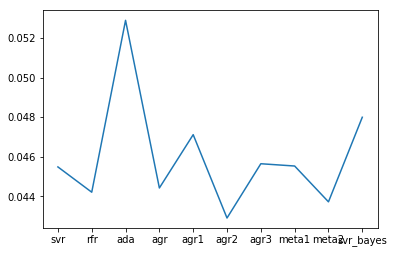

In [196]:
plt.plot(res['model'],res['Tot'])

Visualisation par bloc

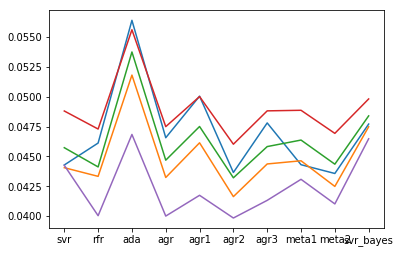

In [197]:
plt.plot(res['model'],res['CV1'])
plt.plot(res['model'],res['CV2'])
plt.plot(res['model'],res['CV3'])
plt.plot(res['model'],res['CV4'])
plt.plot(res['model'],res['CV5'])

Le modèle retenu.

In [198]:
res.loc[res['Tot']==min(res['Tot']),'model']

6    agr2
Name: model, dtype: object

Observation pour chaque bloc de la cv 5-fold

In [199]:
print(res.loc[res['CV1']==min(res['CV1']),'model'])
print(res.loc[res['CV2']==min(res['CV2']),'model'])
print(res.loc[res['CV3']==min(res['CV3']),'model'])
print(res.loc[res['CV4']==min(res['CV4']),'model'])
print(res.loc[res['CV5']==min(res['CV5']),'model'])

9    meta2
Name: model, dtype: object
6    agr2
Name: model, dtype: object
6    agr2
Name: model, dtype: object
6    agr2
Name: model, dtype: object
6    agr2
Name: model, dtype: object


In [200]:
pred.head()

,TRUE,svr,rfr,ada,agr,agr1,agr2,agr3,meta1,meta2,svr_bayes
0,0.650648,0.690945,0.685395,0.616062,0.664134,0.650728,0.68817,0.653504,0.662669,0.67542,0.71313
1,0.699792,0.706617,0.670051,0.606896,0.661188,0.638474,0.688334,0.656757,0.673914,0.681124,0.626621
2,0.632129,0.692112,0.653654,0.611405,0.65239,0.63253,0.672883,0.651758,0.692494,0.682688,0.735714
3,0.810730,0.698772,0.691906,0.606751,0.66581,0.649329,0.695339,0.652762,0.720615,0.707977,0.712148
4,0.757614,0.772815,0.800038,0.797158,0.790004,0.798598,0.786426,0.784987,0.763434,0.77493,0.654803


### Entrainement du modèle retenu avec l'ensemble des données train

##### Partie SVR

In [201]:
model_svr = SVR(C     =gs_svr.best_params_['C'],
                gamma =gs_svr.best_params_['gamma'],
                kernel=gs_svr.best_params_['kernel'])
model_svr.fit(x_train,y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

##### Partie RandomForestRegressor

In [202]:
model_rfr = RandomForestRegressor(max_features=gs_rfr.best_params_['max_features'],
                                  n_estimators=gs_rfr.best_params_['n_estimators'])
model_rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)